In [51]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

/Users/omaralharbi/opt/anaconda3/envs/Datrition/lib/python3.7/site-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


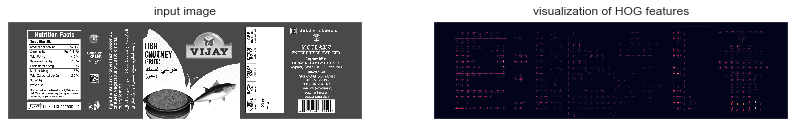

In [2]:

from skimage import data, color, feature
import skimage.data

#image = color.rgb2gray(data.chelsea())
image = cv2.imread("./images/764303_0000FISH 120 GM.jpg", 0)
hog_vec, hog_vis = feature.hog(image, visualise=True)

fig, ax = plt.subplots(1, 2, figsize=(14, 8),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

In [3]:
# from PIL import Image
# import os, os.path
# imgs = []
# path = 'img'
# valid_images = ['.jpg','.gif','.png','.tga']
# for f in os.listdir(path):
#     ext = os.path.splitext(f)[1]
#     if ext.lower() not in valid_images:
#         continue
#     imgs.append(Image.open(os.path.join(path,f))

In [ ]:
# import cv2
# import glob
# for img in glob.glob("./img/*.jpg"):
#     cv_img = cv2.imread(img)

In [ ]:
# for file in images:
#     process(file)
# def process(filename):
#     image = mpimg.imread(filename)
#     <something gets done here>
#     plt.figure()
#     plt.imshow(image)

In [68]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

has = []
for img_path in glob.glob('img/*.jpg'):
    has.append(mpimg.imread(img_path))

# plt.figure(figsize=(20,10))
# columns = 5
# for i, image in enumerate(images):
#     plt.subplot(len(images) / columns + 1, columns, i + 1)
#     #plt.imshow(image)

In [56]:
#from sklearn.datasets import fetch_lfw_people
pic = has
positive_patches = pic
#positive_patches.shape
#positive_patches

In [62]:
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]

In [65]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
#negative_patches.shape

ValueError: too many values to unpack (expected 2)

NameError: name 'negative_patches' is not defined

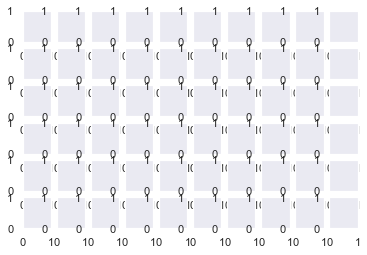

In [66]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [67]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

NameError: name 'negative_patches' is not defined